**RANDOM FOREST MODEL**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('cleaned_final_dataset (1).csv')
data.head(10)

,Region,Country,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male
0,Africa,Algeria,2005,62.913425,5.466833,3131.328300,32956690.0,3.82,2.80,4.83
1,Africa,Algeria,2006,64.930411,5.466833,3500.134528,33435080.0,3.65,2.66,4.63
2,Africa,Algeria,2007,63.166849,5.466833,3971.803658,33983827.0,3.46,2.51,4.41
3,Africa,Algeria,2008,63.532240,5.466833,4946.563793,34569592.0,3.31,2.40,4.22
4,Africa,Algeria,2009,64.259726,5.466833,3898.478923,35196037.0,3.15,2.29,4.02
5,Africa,Algeria,2010,64.268219,5.464000,4495.921455,35856344.0,3.00,2.19,3.81
6,Africa,Algeria,2011,64.960822,5.317000,5473.446129,36543541.0,2.94,2.13,3.74
7,Africa,Algeria,2012,64.290437,5.605000,5610.733341,37260563.0,2.89,2.10,3.68
8,Africa,Algeria,2013,63.704658,5.980000,5519.777576,38000626.0,2.85,2.06,3.64
9,Africa,Algeria,2014,65.195890,6.355000,5516.229431,38760168.0,2.78,2.02,3.53


In [3]:
# Select relevant features and target (assuming 'Both sexes' is the target variable for suicide rates)
X = data[['AvgTemperature', 'Happiness Index', 'GDP', 'Population']]
y = data['Both sexes']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict on test data
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error (MAE): 1.4483042107545736
Root Mean Squared Error (RMSE): 2.33779142211635
R² Score: 0.8241483384701337


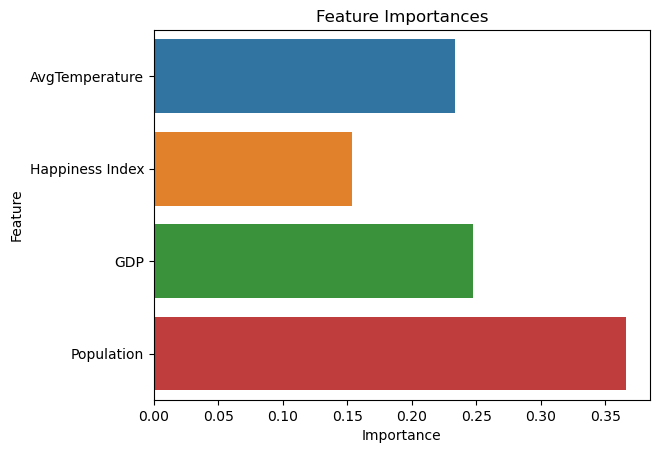

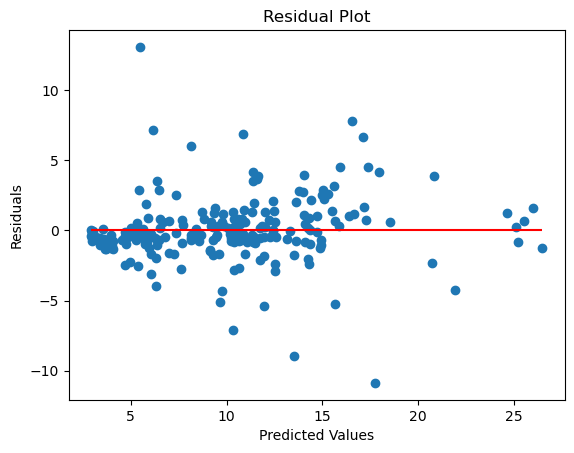

In [4]:
# Feature importance visualization
feature_importances = best_rf.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

**Observations from the Feature Importance Plot:**

1. **Population (Highest Importance)**:
   - **Observation**: Population has the highest feature importance (~35%+).
   - **Conclusion**: Areas with larger populations may have stronger correlations with suicide rates, either due to higher absolute numbers or due to societal and infrastructural challenges associated with larger populations.
   - **Implication**: Policymakers may need to focus on densely populated regions to identify and address factors contributing to higher suicide rates.

2. **GDP**:
   - **Observation**: GDP contributes significantly (~25%) to the prediction.
   - **Conclusion**: Economic conditions play a crucial role in determining suicide rates. A low or unstable GDP might correlate with financial stress and societal challenges leading to higher rates.
   - **Implication**: Economic policies, such as job creation or poverty reduction, could help alleviate suicide rates in vulnerable regions.

3. **Average Temperature**:
   - **Observation**: Average temperature also plays a substantial role (~20%).
   - **Conclusion**: Climate and weather conditions might influence mental health and societal behavior. For example, extreme temperatures (either hot or cold) could correlate with higher stress levels or seasonal mental health trends.
   - **Implication**: Understanding regional climate impacts can help tailor mental health initiatives or interventions.

4. **Happiness Index (Least Importance)**:
   - **Observation**: The Happiness Index has the lowest feature importance (~15%).
   - **Conclusion**: While the Happiness Index provides an overall measure of societal well-being, it may not capture granular stressors or individual mental health struggles that directly influence suicide rates.
   - **Implication**: Although important, happiness measures should be supplemented with other socio-economic or health-related indicators for a complete analysis.

**CALCULATING F1 SCORE, ACCURACY AND PRECISION**

In [5]:
# Define risk levels for suicide rates
# You can modify these thresholds based on your data distribution
data['Risk_Level'] = pd.cut(data['Both sexes'], bins=[0, 2, 5, 10], labels=['Low', 'Medium', 'High'])

# Update X and y for classification
X = data[['AvgTemperature', 'Happiness Index', 'GDP', 'Population']]
y = data['Risk_Level']

In [6]:
# Handle missing values by filling with the mean of each column
from sklearn.ensemble import RandomForestClassifier

X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])  # Filling with mode as 'Risk_Level' is a categorical variable

# Split data for classification task again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = rf_classifier.predict(X_test)

In [7]:
# Accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 Score for each class
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9344978165938864
Precision: 0.9329444755891263
Recall: 0.9344978165938864
F1 Score: 0.9322755857916225
Confusion Matrix:
 [[181   4]
 [ 11  33]]
Classification Report:
               precision    recall  f1-score   support

        High       0.94      0.98      0.96       185
      Medium       0.89      0.75      0.81        44

    accuracy                           0.93       229
   macro avg       0.92      0.86      0.89       229
weighted avg       0.93      0.93      0.93       229



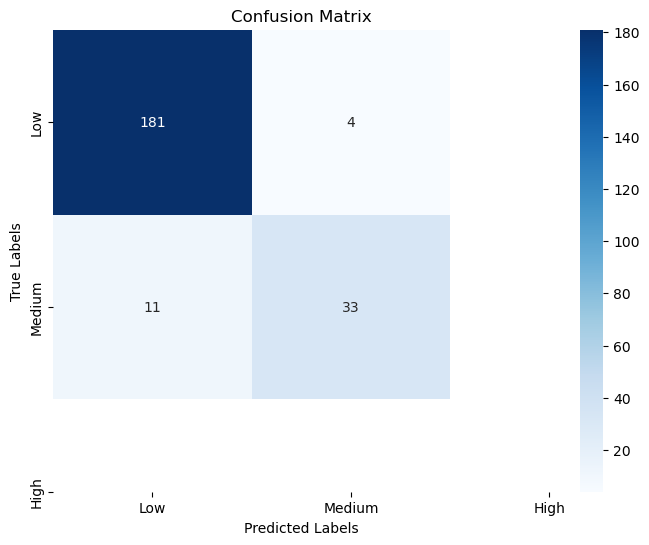

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**FINE TUNE MODEL**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9388646288209607
Precision: 0.9374784156257032
Recall: 0.9388646288209607
F1 Score: 0.9371157511166305
Confusion Matrix:
 [[181   4]
 [ 10  34]]
Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.98      0.96       185
      Medium       0.89      0.77      0.83        44

    accuracy                           0.94       229
   macro avg       0.92      0.88      0.90       229
weighted avg       0.94      0.94      0.94       229



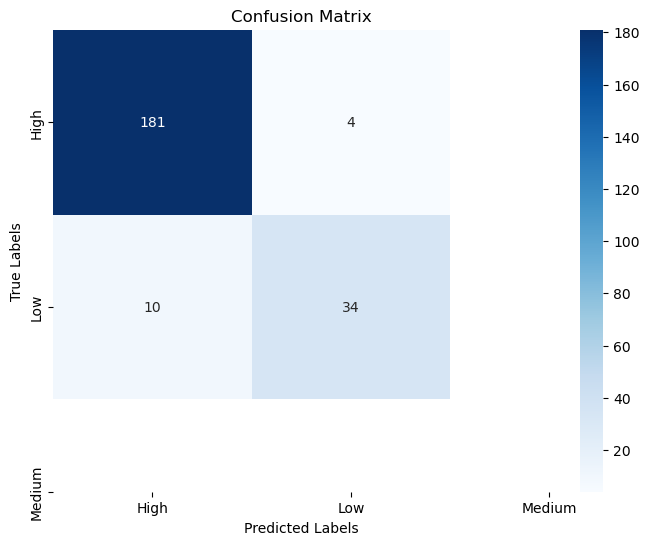

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the parameter grid for fine-tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Remove 'auto'
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1  # Reduce verbosity
)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_rf_classifier = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict on test data using the best model
y_pred = best_rf_classifier.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_classifier.classes_, yticklabels=best_rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Key Observations For Random Forest Model:
1. **Accuracy**:
   - **Before Fine-Tuning**: 93.4%
   - **After Fine-Tuning**: 93.9%
   - **Improvement**: A slight increase in accuracy indicates that fine-tuning has optimized the model's generalization to some extent.

2. **Precision**:
   - **Before Fine-Tuning**: 93.3%
   - **After Fine-Tuning**: 93.7%
   - **Interpretation**: The model's ability to correctly predict positive cases improved slightly.

3. **Recall**:
   - **Before Fine-Tuning**: 93.4%
   - **After Fine-Tuning**: 93.9%
   - **Interpretation**: The model's ability to identify all relevant cases has slightly improved.

4. **F1-Score**:
   - **Before Fine-Tuning**: 93.2%
   - **After Fine-Tuning**: 93.7%
   - **Interpretation**: The balance between precision and recall has improved, indicating a marginal enhancement in overall performance.

5. **Confusion Matrix**:
   - **Before Fine-Tuning**: 
     - True Positives for "High": 181
     - False Negatives for "High": 4
     - True Positives for "Medium": 33
     - False Negatives for "Medium": 11
   - **After Fine-Tuning**:
     - True Positives for "High": 181
     - False Negatives for "High": 4
     - True Positives for "Medium": 34
     - False Negatives for "Medium": 10
   - **Interpretation**: The model after fine-tuning has slightly improved its ability to predict the "Medium" class, reducing misclassification for this category.

6. **Classification Report**:
   - **High Class**:
     - Precision, recall, and F1-score for "High" remain consistently high (~95% after fine-tuning).
   - **Medium Class**:
     - Fine-tuning improved recall for "Medium" from 75% to 77%, which led to an improvement in its F1-score from 81% to 83%.

7. **Best Parameters Found**:
   - The fine-tuned model used 200 estimators, `sqrt` for `max_features`, no maximum depth, `min_samples_split=2`, and `min_samples_leaf=1`. These parameters balanced the model complexity and performance.

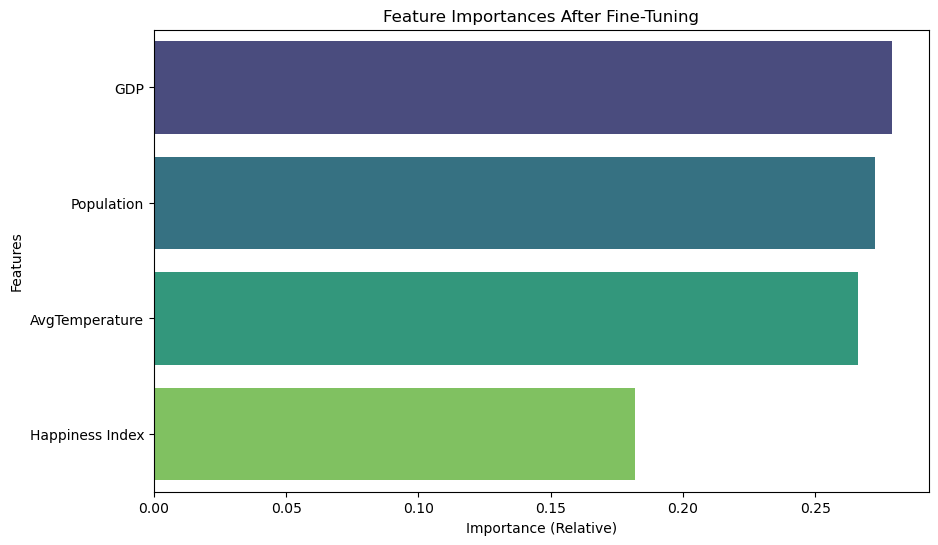

In [10]:
# Feature importance for fine-tuned Random Forest
feature_importances_after = best_rf_classifier.feature_importances_
features = X.columns  # Assuming X contains the feature set
sorted_indices_after = feature_importances_after.argsort()[::-1]
sorted_features_after = features[sorted_indices_after]
sorted_importances_after = feature_importances_after[sorted_indices_after]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_after, y=sorted_features_after, palette="viridis")
plt.title("Feature Importances After Fine-Tuning")
plt.xlabel("Importance (Relative)")
plt.ylabel("Features")
plt.show()

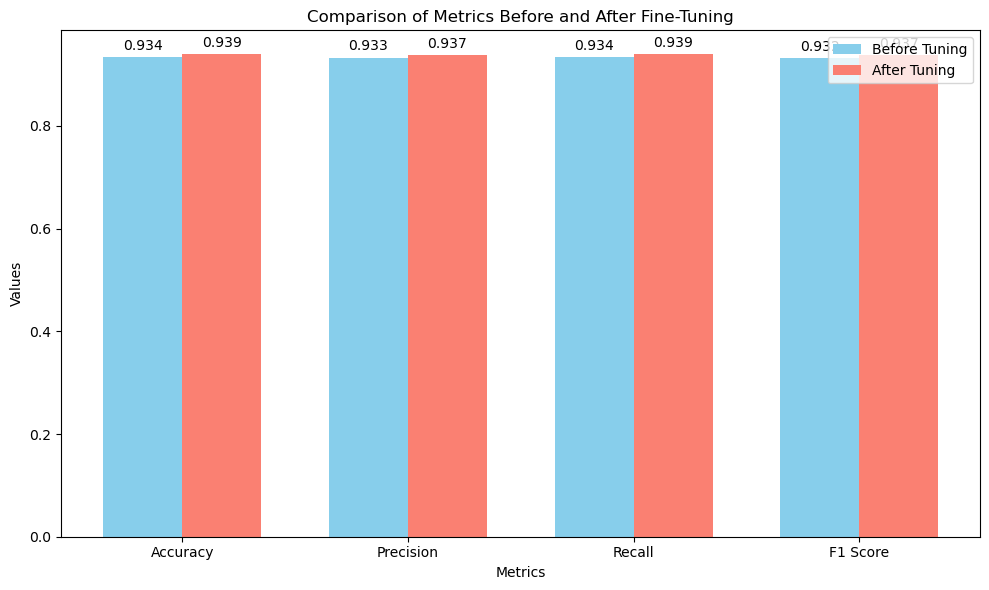

In [11]:
# Updated metrics for comparison
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
before_tuning = [0.934, 0.933, 0.934, 0.932]  # Metrics before fine-tuning
after_tuning = [0.939, 0.937, 0.939, 0.937]   # Metrics after fine-tuning

# Create bar chart for comparison
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, before_tuning, width, label="Before Tuning", color='skyblue')
bars2 = ax.bar(x + width/2, after_tuning, width, label="After Tuning", color='salmon')

# Add labels, title, and legend
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_title("Comparison of Metrics Before and After Fine-Tuning")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars with their values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.3f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Assuming `X_test` is your test features and `y_test` is your true labels
# `y_pred` are the predictions made by the fine-tuned model

# Create a DataFrame for comparison
after_fine_tuning_df = pd.DataFrame({
    "Actual": y_test,            # Actual labels
    "Predicted": y_pred,         # Predictions from the fine-tuned model
})

# If you want to include the features for each prediction
features_df = pd.DataFrame(X_test, columns=X.columns)  # Convert X_test to DataFrame with column names
after_fine_tuning_df = pd.concat([features_df, after_fine_tuning_df], axis=1)

# Display the dataset
print("Dataset After Fine-Tuning:")
print(after_fine_tuning_df.head())

# Optional: Save the dataset to a CSV file for further analysis
after_fine_tuning_df.to_csv("dataset_after_fine_tuning.csv", index=False)

Dataset After Fine-Tuning:
      AvgTemperature  Happiness Index           GDP  Population Actual  \
1071       83.427945            5.580   8880.146040  28717731.0   High   
907        59.790137            6.199  32037.209190  46362946.0   High   
290        41.353671            7.488  40918.850660  33630069.0   High   
844        43.173973            7.416  74427.565413   4660677.0   High   
333        75.603562            5.418   5200.034393  11269887.0   High   

     Predicted  
1071      High  
907       High  
290       High  
844       High  
333       High  


In [13]:
data_2 = pd.read_csv('dataset_after_fine_tuning.csv')
data_2.head(10)

,AvgTemperature,Happiness Index,GDP,Population,Actual,Predicted
0,83.427945,5.580,8880.146040,28717731.0,High,High
1,59.790137,6.199,32037.209190,46362946.0,High,High
2,41.353671,7.488,40918.850660,33630069.0,High,High
3,43.173973,7.416,74427.565413,4660677.0,High,High
4,75.603562,5.418,5200.034393,11269887.0,High,High
5,76.707397,4.500,1418.940825,3322616.0,High,High
6,80.731507,6.076,42971.392200,2363409.0,Medium,High
7,79.624932,3.800,9247.418332,1902226.0,High,High
8,51.521233,6.666,41937.933915,67158348.0,High,High
9,56.945455,4.346,1696.117261,15737793.0,High,High


In [14]:
# Create a DataFrame with features and predictions
after_fine_tuning_df = pd.DataFrame(X_test, columns=X.columns)  # Convert X_test to DataFrame with column names
after_fine_tuning_df["Actual"] = y_test
after_fine_tuning_df["Predicted"] = y_pred

# Include additional columns from the original dataset
# Use the index from X_test to filter the original dataset for corresponding rows
additional_columns = ["Region", "Country", "Year", "Male", "Female", "Both sexes"]
after_fine_tuning_df[additional_columns] = data.loc[X_test.index, additional_columns]

# Reorder the columns for better readability
final_columns_order = additional_columns + list(X.columns) + ["Actual", "Predicted"]
after_fine_tuning_df = after_fine_tuning_df[final_columns_order]

# Display the dataset
print("Dataset After Fine-Tuning with Additional Columns:")
print(after_fine_tuning_df.head())

# Optional: Save the dataset to a CSV file for external analysis
after_fine_tuning_df.to_csv("dataset_after_fine_tuning_with_columns.csv", index=False)

Dataset After Fine-Tuning with Additional Columns:
               Region   Country  Year   Male  Female  Both sexes  \
1071  Western Pacific  Malaysia  2010   7.94    2.53        5.30   
907            Europe     Spain  2009   8.97    2.47        5.62   
290          Americas    Canada  2009  15.53    5.04       10.24   
844            Europe    Norway  2006  16.91    6.38       11.65   
333          Americas      Cuba  2007  16.22    3.99        9.92   

      AvgTemperature  Happiness Index           GDP  Population Actual  \
1071       83.427945            5.580   8880.146040  28717731.0   High   
907        59.790137            6.199  32037.209190  46362946.0   High   
290        41.353671            7.488  40918.850660  33630069.0   High   
844        43.173973            7.416  74427.565413   4660677.0   High   
333        75.603562            5.418   5200.034393  11269887.0   High   

     Predicted  
1071      High  
907       High  
290       High  
844       High  
333       

In [15]:
data_2 = pd.read_csv('dataset_after_fine_tuning_with_columns.csv')
data_2.head(10)

,Region,Country,Year,Male,Female,Both sexes,AvgTemperature,Happiness Index,GDP,Population,Actual,Predicted
0,Western Pacific,Malaysia,2010,7.94,2.53,5.30,83.427945,5.580,8880.146040,28717731.0,High,High
1,Europe,Spain,2009,8.97,2.47,5.62,59.790137,6.199,32037.209190,46362946.0,High,High
2,Americas,Canada,2009,15.53,5.04,10.24,41.353671,7.488,40918.850660,33630069.0,High,High
3,Europe,Norway,2006,16.91,6.38,11.65,43.173973,7.416,74427.565413,4660677.0,High,High
4,Americas,Cuba,2007,16.22,3.99,9.92,75.603562,5.418,5200.034393,11269887.0,High,High
5,Africa,Mauritania,2009,7.26,4.12,5.56,76.707397,4.500,1418.940825,3322616.0,High,High
6,Eastern Mediterranean,Kuwait,2006,3.71,1.15,2.72,80.731507,6.076,42971.392200,2363409.0,Medium,High
7,Africa,Gabon,2013,24.29,3.97,13.57,79.624932,3.800,9247.418332,1902226.0,High,High
8,Europe,France,2018,15.80,4.73,10.05,51.521233,6.666,41937.933915,67158348.0,High,High
9,Africa,Zambia,2014,30.20,7.87,17.74,56.945455,4.346,1696.117261,15737793.0,High,High
